In [1]:
import pandas as pd
import numpy as np
import sklearn

# reading in the csv of everyone who took the diabetes survey
diabetics = pd.read_csv('~/Downloads/NHANES-DR/P_DIQ_2017_2020.csv')
# diabetics = pd.read_csv('/content/P_DIQ_2017_2020.csv')

# print(diabetics)

In [2]:
# reading in whoever took the NHANES demographics survey
demographics = pd.read_csv('~/Downloads/NHANES-DR/P_DEMO_2017_2020.csv')
# demographics = pd.read_csv('/content/P_DEMO_2017_2020.csv')
# print(demographics)

In [3]:
# # Define the mapping dictionaries
# gender_mapping = {'1': 'Male', '2': 'Female', 'NA': 'Missing'}
# ethnic_mapping = {'1': 'Mexican American', '2': 'Other Hispanic',
#                   '3': 'Non-Hispanic White', '4': 'Non-Hispanic Black',
#                   '6': 'Non-Hispanic Asian', '7': 'Other Race - Including Multi-Racial', 'NA': 'Missing'}
# educ_level_map = {'1':	'Less than 9th grade',
#                   '2':	'9-11th grade (Includes 12th grade with no diploma)',
#                   '3':	'High school graduate/GED or equivalent',
#                   '4':	'Some college or AA degree',
#                   '5':	'College graduate or above',
#                   '7':	'Refused',
#                   '9':	"Don't Know",
#                   'NA':	'Missing'}

# # Recode the values
# demographics['RIAGENDR'] = demographics['RIAGENDR'].map(gender_mapping)
# demographics['RIDRETH3'] = demographics['RIDRETH3'].map(ethnic_mapping)
# demographics['DMDEDUC2'] = demographics['DMDEDUC2'].map(educ_level_map)

# Rename the columns
demographics = demographics.rename(columns={'RIAGENDR': 'Sex'})
demographics = demographics.rename(columns={'RIDRETH3': 'Ethnicity'})
demographics = demographics.rename(columns={'DMDEDUC2': 'Education level'})

print(demographics)

           SEQN  SDDSRVYR  RIDSTATR  Sex  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0      109263.0      66.0       2.0  1.0       2.0       NaN       5.0   
1      109264.0      66.0       2.0  2.0      13.0       NaN       1.0   
2      109265.0      66.0       2.0  1.0       2.0       NaN       3.0   
3      109266.0      66.0       2.0  2.0      29.0       NaN       5.0   
4      109267.0      66.0       1.0  2.0      21.0       NaN       2.0   
...         ...       ...       ...  ...       ...       ...       ...   
15555  124818.0      66.0       2.0  1.0      40.0       NaN       4.0   
15556  124819.0      66.0       2.0  1.0       2.0       NaN       4.0   
15557  124820.0      66.0       2.0  2.0       7.0       NaN       3.0   
15558  124821.0      66.0       2.0  1.0      63.0       NaN       4.0   
15559  124822.0      66.0       2.0  1.0      74.0       NaN       2.0   

       Ethnicity  RIDEXMON  DMDBORN4  ...  FIAINTRP  MIALANG  MIAPROXY  \
0            6.0       2.0       1.0 

In [4]:
# this table now has everyone who took the demographic and diabetes surveys with demographic info
diabetics = diabetics.merge(demographics, on = "SEQN", how = "inner")
# print(diabetics.size())

In [5]:
# this table has everyone who has diabetes
only_dm = diabetics.query("DIQ010 == 1")
# print(only_dm.size())

## Demographic distributions for people surveyed that have diabetes:

Here we take the combined table of the diabetes survey joined with demographics and filtered for only those people with diabetes.
Now we will look at each of the significant demographic variables, create plots to break down the distribution of diabetes across each group for each variable, and do hypothesis tests for whether the distribution matches a certain default spread

In [6]:
only_dm.columns

Index(['SEQN', 'DIQ010', 'DID040', 'DIQ160', 'DIQ180', 'DIQ050', 'DID060',
       'DIQ060U', 'DIQ070', 'DIQ230', 'DIQ240', 'DID250', 'DID260', 'DIQ260U',
       'DIQ275', 'DIQ280', 'DIQ291', 'DIQ300S', 'DIQ300D', 'DID310S',
       'DID310D', 'DID320', 'DID330', 'DID341', 'DID350', 'DIQ350U', 'DIQ360',
       'DIQ080', 'SDDSRVYR', 'RIDSTATR', 'Sex', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'Ethnicity', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ',
       'Education level', 'DMDMARTZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY',
       'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY',
       'MIAINTRP', 'AIALANGA', 'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA',
       'INDFMPIR'],
      dtype='object')

In [7]:
# this is a table of everyone with diabetic retinopathy
only_dm_ret = only_dm.query("DIQ080 == 1")
# print(only_dm_ret.size())

In [8]:
only_dm_ret.query('Sex == 2.0')['Sex']

48       2.0
102      2.0
354      2.0
367      2.0
552      2.0
        ... 
14603    2.0
14697    2.0
14827    2.0
14883    2.0
14884    2.0
Name: Sex, Length: 140, dtype: float64

In [9]:
dm_gend_dist = (only_dm.groupby(['Sex']).size()).reset_index(name = 'diabetes gender counts')
dm_gend_dist['diabetes gender proportions'] = dm_gend_dist['diabetes gender counts']/sum(dm_gend_dist['diabetes gender counts'])
total_gend_dist = (demographics.groupby(['Sex']).size()).reset_index(name = 'counts')
dm_gend_dist['percent of total population of gender with diabetes'] = dm_gend_dist['diabetes gender counts']/total_gend_dist['counts']
dm_gend_dist['count of diabetics with retinopathy'] = (only_dm_ret.groupby(['Sex']).size())
dm_gend_dist['percent of diabetics of each gender with retinopathy'] = dm_gend_dist['count of diabetics with retinopathy']/dm_gend_dist['diabetes gender counts']
dm_gend_dist

,Sex,diabetes gender counts,diabetes gender proportions,percent of total population of gender with diabetes,count of diabetics with retinopathy,percent of diabetics of each gender with retinopathy
0,1.0,771,0.533564,0.099858,NaN,NaN
1,2.0,674,0.466436,0.085980,141.0,0.209199


In [10]:
print(only_dm_ret.groupby('Ethnicity').size())

Ethnicity
1.0    32
2.0    36
3.0    86
4.0    84
6.0    31
7.0    12
dtype: int64


In [11]:
print(len(only_dm_ret.query('Ethnicity == 1.0')['Ethnicity']))
print(len(only_dm_ret.query('Ethnicity == 2.0')['Ethnicity']))
print(len(only_dm_ret.query('Ethnicity == 3.0')['Ethnicity']))
print(len(only_dm_ret.query('Ethnicity == 4.0')['Ethnicity']))
print(len(only_dm_ret.query('Ethnicity == 6.0')['Ethnicity']))
print(len(only_dm_ret.query('Ethnicity == 7.0')['Ethnicity']))

32
36
86
84
31
12


In [12]:
# this is where we will analyze the demographic variable distributions for everyone with diabetes
ethn_dm_dist = (only_dm.groupby(['Ethnicity']).size()).reset_index(name = 'dm_counts')
ethn_dm_dist['dm_props'] = ethn_dm_dist['dm_counts']/sum(ethn_dm_dist['dm_counts'])
total_ethn = (demographics.groupby(['Ethnicity']).size()).reset_index(name = 'counts')
ethn_dm_dist['total_ethn_counts'] = total_ethn['counts']
ethn_dm_dist['total_ethn_props'] = ethn_dm_dist['dm_counts']/sum(ethn_dm_dist['total_ethn_counts'])
ethn_dm_dist['count of diabetics with retinopathy'] = (only_dm_ret.groupby(['Ethnicity']).size())
ethn_dm_dist['percent of diabetics of each ethnicity with retinopathy'] = ethn_dm_dist['count of diabetics with retinopathy']/ethn_dm_dist['dm_counts']
ethn_dm_dist

,Ethnicity,dm_counts,dm_props,total_ethn_counts,total_ethn_props,count of diabetics with retinopathy,percent of diabetics of each ethnicity with retinopathy
0,1.0,187,0.129412,1990,0.012018,NaN,NaN
1,2.0,145,0.100346,1544,0.009319,32.0,0.220690
2,3.0,470,0.325260,5271,0.030206,36.0,0.076596
3,4.0,418,0.289273,4098,0.026864,86.0,0.205742
4,6.0,150,0.103806,1638,0.009640,84.0,0.560000
5,7.0,75,0.051903,1019,0.004820,NaN,NaN


In [13]:
# this is where we will analyze the demographic variable distributions for everyone with diabetes
educ_dm_dist = (only_dm.groupby(['Education level']).size()).reset_index(name = 'dm_counts')
educ_dm_dist['dm_props'] = educ_dm_dist['dm_counts']/sum(educ_dm_dist['dm_counts'])
total_educ = (demographics.groupby(['Education level']).size()).reset_index(name = 'counts')
educ_dm_dist['total_educ_counts'] = total_educ['counts']
educ_dm_dist['total_educ_props'] = educ_dm_dist['dm_counts']/sum(educ_dm_dist['total_educ_counts'])
educ_dm_dist['count of diabetics with retinopathy'] = (only_dm_ret.groupby(['Ethnicity']).size())
educ_dm_dist['percent of diabetics of each ethnicity with retinopathy'] = educ_dm_dist['count of diabetics with retinopathy']/educ_dm_dist['dm_counts']
educ_dm_dist

,Education level,dm_counts,dm_props,total_educ_counts,total_educ_props,count of diabetics with retinopathy,percent of diabetics of each ethnicity with retinopathy
0,1.0,186,0.130986,719,0.020176,NaN,NaN
1,2.0,193,0.135915,1041,0.020935,32.0,0.165803
2,3.0,349,0.245775,2225,0.037857,36.0,0.103152
3,4.0,438,0.308451,2975,0.047511,86.0,0.196347
4,5.0,252,0.177465,2257,0.027335,84.0,0.333333
5,9.0,2,0.001408,2,0.000217,NaN,NaN


In [14]:
ethn_educ_dm_dist = (only_dm.groupby(['Ethnicity', 'Education level']).size()).reset_index(name = 'dm_counts')
ethn_educ_dm_dist['dm_props'] = ethn_educ_dm_dist['dm_counts']/sum(ethn_educ_dm_dist['dm_counts'])
total_ethn = (demographics.groupby(['Ethnicity', 'Education level']).size()).reset_index(name = 'counts')
ethn_educ_dm_dist['total_counts'] = total_ethn['counts']
ethn_educ_dm_dist['total_props'] = ethn_educ_dm_dist['dm_counts']/sum(ethn_educ_dm_dist['total_counts'])
ethn_educ_dm_dist['count of diabetics with retinopathy'] = (only_dm_ret.groupby(['Ethnicity']).size())
ethn_educ_dm_dist['percent of diabetics of each ethnicity with retinopathy'] = ethn_educ_dm_dist['count of diabetics with retinopathy']/ethn_educ_dm_dist['dm_counts']
ethn_educ_dm_dist

,Ethnicity,Education level,dm_counts,dm_props,total_counts,total_props,count of diabetics with retinopathy,percent of diabetics of each ethnicity with retinopathy
0,1.0,1.0,78,0.054930,279,0.008856,NaN,NaN
1,1.0,2.0,32,0.022535,178,0.003633,32.0,1.000000
2,1.0,3.0,28,0.019718,244,0.003179,36.0,1.285714
3,1.0,4.0,31,0.021831,261,0.003520,86.0,2.774194
4,1.0,5.0,12,0.008451,93,0.001362,84.0,7.000000
5,1.0,9.0,1,0.000704,2,0.000114,NaN,NaN
6,2.0,1.0,46,0.032394,195,0.005223,31.0,0.673913
7,2.0,2.0,25,0.017606,141,0.002838,12.0,0.480000
8,2.0,3.0,26,0.018310,192,0.002952,NaN,NaN
9,2.0,4.0,36,0.025352,256,0.004087,NaN,NaN


In [15]:
# Group by the demographic factors and calculate the proportion with diabetic retinopathy
grouped = df.groupby(['diabetes', 'pre_diabetes', 'vision_problems'])['diabetic_retinopathy'].value_counts(normalize=True).unstack().fillna(0)

NameError: name 'df' is not defined

In [ ]:
# Reset index to get a DataFrame suitable for plotting
plot_data = grouped.reset_index()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x locations for the groups
x = np.arange(len(plot_data))

# Define bar width
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots()

# Create bars for 'yes' diabetic retinopathy
bars1 = ax.bar(x - bar_width/2, plot_data['yes'], bar_width, label='Retinopathy: Yes')

# Create bars for 'no' diabetic retinopathy
bars2 = ax.bar(x + bar_width/2, plot_data['no'], bar_width, label='Retinopathy: No')

# Add labels, title, and legend
ax.set_xlabel('Demographic Combination')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Diabetic Retinopathy by Demographic Factors')
ax.set_xticks(x)
ax.set_xticklabels(plot_data.apply(lambda row: f"{row['diabetes']}/{row['pre_diabetes']}/{row['vision_problems']}", axis=1), rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

### This is where we will look at pre-diabetic patients' racial, educational, other demographic distributions

We will repeat the same process as above doing a Chi-square distribution but this time we already have the distribution of demographics for the entire NHANES surveyed people

In [ ]:
# this is everyone who has prediabetes
only_pre_dm = diabetics.query("DIQ160 == 1")
print(only_pre_dm)

In [ ]:
# this is where we will analyze the demographic variable distributions for everyone with diabetes
ethn_dm_dist = (only_pre_dm.groupby(['Ethnicity']).size()).reset_index(name = 'pre-dm_counts')
total_ethn = (demographics.groupby(['Ethnicity']).size()).reset_index(name = 'counts')
ethn_dm_dist['total_ethn_counts'] = total_ethn['counts']
ethn_dm_dist

In [ ]:
# this is where we will analyze the demographic variable distributions for everyone with diabetes
educ_dm_dist = (only_pre_dm.groupby(['Education level']).size()).reset_index(name = 'pre-dm_counts')
total_educ = (demographics.groupby(['Education level']).size()).reset_index(name = 'counts')
educ_dm_dist['total_educ_counts'] = total_educ['counts']
educ_dm_dist

In [ ]:
ethn_educ_dm_dist = (only_pre_dm.groupby(['Ethnicity', 'Education level']).size()).reset_index(name = 'pre-dm_counts')
total_ethn = (demographics.groupby(['Ethnicity', 'Education level']).size()).reset_index(name = 'counts')
ethn_educ_dm_dist['total_counts'] = total_ethn['counts']
ethn_educ_dm_dist

## Linear relationships for various demographics:

Now we will look at some relationships such as:

1.   between **blood pressure** ranges (binned) and the proportion of people *in those ranges* with diabetic retinopathy
2.   between **A1C** ranges (binned) and the proportion of people *in those ranges* with diabetic retinopathy
3.   between **glucose** ranges (binned) and the proportion of people *in those ranges* with diabetic retinopathy

We will do these for the various categorical demographic variables (and combinations of variables) covered before.

In [17]:
# reading in the csv of everyone who took the diabetes survey
bpvals = pd.read_csv('~/Downloads/NHANES-DR/BloodPressureQuestionnaireVals.csv')
# bpvals = pd.read_csv('/content/BloodPressureQuestionnaireVals.csv')

gluvals = pd.read_csv('~/Downloads/NHANES-DR/GlucoseVals.csv')
# gluvals = pd.read_csv('/content/GlucoseVals.csv')

A1Cvals = pd.read_csv('~/Downloads/NHANES-DR/A1CVals.csv')
# A1Cvals = pd.read_csv('/content/A1CVals.csv')

insurance = pd.read_csv('~/Downloads/NHANES-DR/HealthInsuranceQuestionnaireVals.csv')
# insurance = pd.read_csv('/content/HealthInsuranceQuestionnaireVals.csv')

diabetics = diabetics.merge(bpvals, on = "SEQN", how = "inner")
# print(diabetics.size())
diabetics = diabetics.merge(gluvals, on = "SEQN", how = "inner")
# print(diabetics.size())
diabetics = diabetics.merge(insurance, on = "SEQN", how = "inner")
# print(diabetics.size())

print(diabetics)

          SEQN  DIQ010     DID040    DIQ160    DIQ180    DIQ050     DID060  \
0     109271.0     2.0  59.765766  2.000000  1.000000  1.709343  26.618267   
1     109274.0     1.0  54.000000  1.911728  1.762148  1.000000   1.000000   
2     109282.0     2.0  59.765766  2.000000  1.000000  1.709343  26.618267   
3     109286.0     2.0  59.765766  1.000000  1.000000  1.709343  26.618267   
4     109290.0     1.0  60.000000  1.911728  1.762148  2.000000  26.618267   
...        ...     ...        ...       ...       ...       ...        ...   
4649  124813.0     2.0  59.765766  1.000000  1.000000  1.709343  26.618267   
4650  124814.0     2.0  59.765766  2.000000  2.000000  1.709343  26.618267   
4651  124815.0     2.0  59.765766  2.000000  2.000000  1.709343  26.618267   
4652  124821.0     3.0  59.765766  1.911728  1.000000  1.709343  26.618267   
4653  124822.0     2.0  59.765766  1.000000  1.000000  1.709343  26.618267   

       DIQ060U    DIQ070    DIQ230  ...  HIQ032C  HIQ032D  HIQ0

In [ ]:
# diabetics.to_csv('patients_records_partial1.csv', index = True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data
# X1 will be a fraction of the patients with diabetic retinopathy who are male (for other models will change to women, ethnicity values, education levels, insurance availability or combinations of the aforementioned variables)
# X2 will be blood pressure (for other models will change to A1C, glucose etc)
# Y will be the rate of diabetic retinopathy (as a proportion or percentage)
# the training data will be 70% of the total data
# the models could also be compared with the 2005 results maybe?
diabetics.fillna(diabetics.mean(), inplace=True)
X = diabetics[['Sex', 'LBXGLU']]
y = diabetics['DIQ080']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

In [19]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a summary table
summary_table = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [intercept] + coefficients.tolist()
})

print(summary_table)

     Feature  Coefficient
0  Intercept     1.906727
1        Sex    -0.012387
2     LBXGLU    -0.000237


In [20]:
# X1 will be a fraction of the patients with diabetic retinopathy who are male (for other models will change to women, ethnicity values, education levels, insurance availability or combinations of the aforementioned variables)
# X2 will be blood pressure (for other models will change to A1C, glucose etc)
# Y will be the rate of diabetic retinopathy (as a proportion or percentage)
# the training data will be 70% of the total data
# the models could also be compared with the 2005 results maybe?
X = diabetics[['Education level', 'LBXGLU']]
y = diabetics['DIQ080']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

In [21]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a summary table
summary_table = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [intercept] + coefficients.tolist()
})

print(summary_table)

           Feature  Coefficient
0        Intercept     1.912430
1  Education level    -0.006662
2           LBXGLU    -0.000245


In [22]:
# X1 will be a fraction of the patients with diabetic retinopathy who are male (for other models will change to women, ethnicity values, education levels, insurance availability or combinations of the aforementioned variables)
# X2 will be blood pressure (for other models will change to A1C, glucose etc)
# Y will be the rate of diabetic retinopathy (as a proportion or percentage)
# the training data will be 70% of the total data
# the models could also be compared with the 2005 results maybe?
X = diabetics[['Ethnicity', 'LBXGLU', 'Education level']]
y = diabetics['DIQ080']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

In [23]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a summary table
summary_table = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [intercept] + coefficients.tolist()
})

print(summary_table)

           Feature  Coefficient
0        Intercept     1.911847
1        Ethnicity     0.000226
2           LBXGLU    -0.000245
3  Education level    -0.006730


In [25]:
# X1 will be a fraction of the patients with diabetic retinopathy who are male (for other models will change to women, ethnicity values, education levels, insurance availability or combinations of the aforementioned variables)
# X2 will be blood pressure (for other models will change to A1C, glucose etc)
# Y will be the rate of diabetic retinopathy (as a proportion or percentage)
# the training data will be 70% of the total data
# the models could also be compared with the 2005 results maybe?
diabetics['HIQ032J'].fillna('1.0', inplace=True)
X = diabetics[['Ethnicity', 'LBXGLU', 'Education level', 'HIQ032J']]
y = diabetics['DIQ080']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

In [26]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a summary table
summary_table = pd.DataFrame({
    'Feature': ['Intercept'] + X.columns.tolist(),
    'Coefficient': [intercept] + coefficients.tolist()
})

print(summary_table)

           Feature  Coefficient
0        Intercept     1.911847
1        Ethnicity     0.000226
2           LBXGLU    -0.000245
3  Education level    -0.006730
4          HIQ032J     0.000000


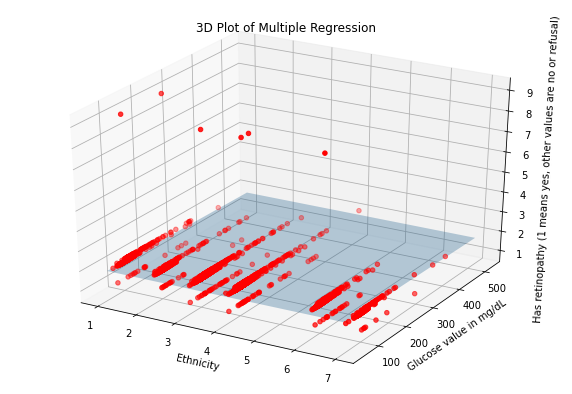

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate grid of values
x_surf, y_surf = np.meshgrid(np.linspace(diabetics.Ethnicity.min(), diabetics.Ethnicity.max(), 100),
                             np.linspace(diabetics.LBXGLU.min(), diabetics.LBXGLU.max(), 100))

# Predict values across the grid
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3, rstride=100, cstride=100)

# Plot actual data points
ax.scatter(diabetics['Ethnicity'], diabetics['LBXGLU'], diabetics['DIQ080'], c='r', marker='o')

# Labels
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Glucose value in mg/dL')
ax.set_zlabel('Has retinopathy (1 means yes, other values are no or refusal)')
ax.set_title('3D Plot of Multiple Regression')

plt.show()

### Consideration:
Identifying patterns of comorbidities between two or more races/ethnicities; and genders (males versus females)

Here we are focusing on diabetics and retinopathy.

Are there differences between ethnicities and the types or subtypes of diabetic retinopathies?

Bioinformatics - we focus on pathways or molecular mechanisms that underlie disease

Incidence rate per 100 is another important metric to use.


What are we expecting (hint: look at the old paper, see what they found as results, see what they didn't investigate)

Table 1: known risk factors (citations for each factor, include citations for those citations).

### Consideration 2:

Why am I looking at this paper?

Why is the NHANES survey order the way it is?

Does it change depending on age, gender or ethnicities etc.,?

How does this help in terms of prompt engineering?

In [ ]:
import openai
from scipy import stats

openai.api_key = 'your-api-key'

def perform_statistical_analysis(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    t_stat, p_value = stats.ttest_1samp(data, 0)
    summary = {
        'mean': mean,
        'std_dev': std_dev,
        't_stat': t_stat,
        'p_value': p_value
    }
    return summary

def summarize_results(summary):
    return (
        f"Mean: {summary['mean']:.2f}, "
        f"Standard Deviation: {summary['std_dev']:.2f}, "
        f"t-Statistic: {summary['t_stat']:.2f}, "
        f"p-Value: {summary['p_value']:.4f}"
    )

def ask_chatgpt(prompt):
    response = openai.Completion.create(
        engine="davinci-codex",  # Use "text-davinci-003" or another suitable model
        prompt=prompt,
        max_tokens=150
    )
    return response.choices[0].text.strip()

def main():
    # Example data
    data = np.random.normal(loc=0, scale=1, size=100)

    # Perform statistical analysis
    summary = perform_statistical_analysis(data)

    # Summarize results
    summary_text = summarize_results(summary)
    print(f"Statistical Summary: {summary_text}")

    # Create the prompt for ChatGPT
    prompt = (
        f"The results of the statistical analysis are as follows:\n{summary_text}\n"
        "What insights can we draw from these results?"
    )

    # Get response from ChatGPT
    response = ask_chatgpt(prompt)
    print(f"ChatGPT Response: {response}")

if __name__ == "__main__":
    main()
